In [1]:
%load_ext autoreload
%reload_ext autoreload
%autoreload 2

import os, sys
import h5py
import numpy as np
import scipy as sp
from astropy import constants as const
import matplotlib.pyplot as plt
import cv2
import units as un
from readdata import *

import yt
from yt.funcs import mylog
mylog.setLevel(40)

%matplotlib notebook
%matplotlib inline

#Define the units
mbin = 3. #M_sun
abin = 50. #AU
u = un.units(mbin, abin)

/u/lgaertner/miniconda3/lib/python3.9/_collections_abc.py:684: MatplotlibDeprecationWarning: The global colormaps dictionary is no longer considered public API.
  self[key]


## 2d data

In [12]:
level = 2

os.chdir("/u/lgaertner/BINARY/RUN_DIR/outputSMR2D")
prim = np.sort([f for f in os.listdir(os.getcwd()) if f.endswith(".athdf") and f.startswith("cbd.out1")])
simulation2d = data2d(prim[-1:], u, level)

#level=1

#os.chdir("/u/lgaertner/BINARY/RUN_DIR/outputSMR3Dlong")
#prim = np.sort([f for f in os.listdir(os.getcwd()) if f.endswith(".athdf") and f.startswith("cbd.out1")])
#simulation3d = data3d(prim[-1:], u, level)

Initializing data readin
Read cbd.out1.10000.athdf
Processed all data


In [13]:
simulation2d.draw(np.log(simulation2d.rho), "_rho.png", lab="$ln(\Sigma) ~[g/cm^3]$", scale = 1./2, low=-38, hig=-26)
simulation2d.draw(simulation2d.temp, "_temp.png", lab="$T ~[K]$", scale = 1./2)

simulation2d.vectorfield("_vfield.png", scale = 1./4)

simulation2d.video(os.getcwd()+"/plots/")

Drew - cbd.out1.10000.athdf
720 720
Created video.


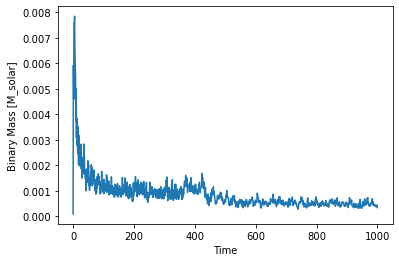

In [5]:
#all masses within 1 code unit = 50AU
m = masses(simulation2d.rho, rmax=1.)/u.msol
plt.plot(m)
plt.xlabel("Time")
plt.ylabel("Binary Mass [M_solar]")
plt.show()

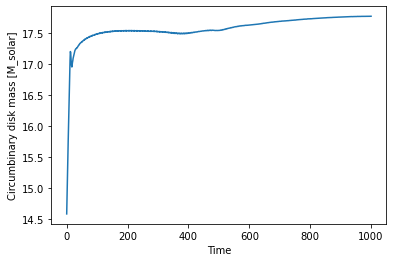

In [6]:
#all masses within 1 code unit = 50AU
m = masses(simulation2d.rho, rmin=1.)/u.msol
plt.plot(m)
plt.xlabel("Time")
plt.ylabel("Circumbinary disk mass [M_solar]")
plt.show()

In [23]:
#VIDEO

images = []
os.chdir("/u/lgaertner/BINARY/RUN_DIR/outputSMR2D/plots/")
files = np.sort([f for f in os.listdir(os.getcwd()) if f.endswith("rho.png")])
for f in files[:1000]:
    images.append(cv2.imread(f))
height,width,layers=np.shape(images[1])
print(height, width)
fourcc = cv2.VideoWriter_fourcc(*"XVID")
#fourcc = cv2.VideoWriter_fourcc(*'DIVX')
video=cv2.VideoWriter('evolution.avi',fourcc, 5,(width,height), True)
for i in images:
    video.write(i)
cv2.destroyAllWindows()
video.release()
os.chdir("/u/lgaertner/BINARY/RUN_DIR/outputSMR2D")

720 720


In [6]:
os.chdir("/u/lgaertner/BINARY/RUN_DIR/outputSMR2D/plots/")
os.getcwd()
os.chdir("..")
os.getcwd()
os.chdir("plots")
os.getcwd()

'/ccas/u/lgaertner/BINARY/RUN_DIR/outputSMR2D/plots'

## 3d data

In [2]:
level=2

os.chdir("/u/lgaertner/BINARY/RUN_DIR/outputSMR3Doutflow")
prim = np.sort([f for f in os.listdir(os.getcwd()) if f.endswith(".athdf") and f.startswith("cbd.out1")])
simulation3d = data3d(prim[::100], u, level)

Initializing data readin
Read cbd.out1.00000.athdf
Read cbd.out1.00100.athdf
Read cbd.out1.00200.athdf
Read cbd.out1.00300.athdf
Read cbd.out1.00400.athdf
Read cbd.out1.00500.athdf
Read cbd.out1.00600.athdf
Read cbd.out1.00700.athdf
Read cbd.out1.00800.athdf
Read cbd.out1.00900.athdf
Read cbd.out1.01000.athdf
Read cbd.out1.01100.athdf
Read cbd.out1.01200.athdf
Read cbd.out1.01300.athdf
Read cbd.out1.01400.athdf
Processed all data


In [21]:
#simulation3d.plot3d(simulation3d.rho, "_rho.png", lab="$\Sigma ~[g/cm^3]$")
simulation3d.column(simulation3d.rho, np.mean, "_rho.png", lab="$ln(\Sigma) ~[g/cm^3]$", scale = 1./2, low=-30, hig=-27)
#simulation3d.column(np.log(simulation3d.temp), np.max, "_temp.png", lab="$ln(T) ~[K]$", scale = 1./2)

Drew cbd.out1.00000.athdf
Drew cbd.out1.00100.athdf
Drew cbd.out1.00200.athdf
Drew cbd.out1.00300.athdf
Drew cbd.out1.00400.athdf
Drew cbd.out1.00500.athdf
Drew cbd.out1.00600.athdf
Drew cbd.out1.00700.athdf
Drew cbd.out1.00800.athdf
Drew cbd.out1.00900.athdf
Drew cbd.out1.01000.athdf
Drew cbd.out1.01100.athdf
Drew cbd.out1.01200.athdf
Drew cbd.out1.01300.athdf
Drew cbd.out1.01400.athdf


In [24]:
level=2

os.chdir("/u/lgaertner/BINARY/RUN_DIR/outputSMR3Doutflow")
prim = np.sort([f for f in os.listdir(os.getcwd()) if f.endswith(".athdf") and f.startswith("cbd.out1")])
for f in prim[:1000]:
    simulation3d = data3d([f], u, level)
    simulation3d.column(simulation3d.rho, np.mean, "_rho.png", lab="$ln(\Sigma) ~[g/cm^3]$", scale = 1./2, low=-30, hig=-27)

Initializing data readin
Read cbd.out1.00000.athdf
Processed all data
Drew cbd.out1.00000.athdf
Initializing data readin
Read cbd.out1.00001.athdf
Processed all data
Drew cbd.out1.00001.athdf
Initializing data readin
Read cbd.out1.00002.athdf
Processed all data
Drew cbd.out1.00002.athdf
Initializing data readin
Read cbd.out1.00003.athdf
Processed all data
Drew cbd.out1.00003.athdf
Initializing data readin
Read cbd.out1.00004.athdf
Processed all data
Drew cbd.out1.00004.athdf
Initializing data readin
Read cbd.out1.00005.athdf
Processed all data
Drew cbd.out1.00005.athdf
Initializing data readin
Read cbd.out1.00006.athdf
Processed all data
Drew cbd.out1.00006.athdf
Initializing data readin
Read cbd.out1.00007.athdf
Processed all data
Drew cbd.out1.00007.athdf
Initializing data readin
Read cbd.out1.00008.athdf
Processed all data
Drew cbd.out1.00008.athdf
Initializing data readin
Read cbd.out1.00009.athdf
Processed all data
Drew cbd.out1.00009.athdf
Initializing data readin
Read cbd.out1.0

Processed all data
Drew cbd.out1.00085.athdf
Initializing data readin
Read cbd.out1.00086.athdf
Processed all data
Drew cbd.out1.00086.athdf
Initializing data readin
Read cbd.out1.00087.athdf
Processed all data
Drew cbd.out1.00087.athdf
Initializing data readin
Read cbd.out1.00088.athdf
Processed all data
Drew cbd.out1.00088.athdf
Initializing data readin
Read cbd.out1.00089.athdf
Processed all data
Drew cbd.out1.00089.athdf
Initializing data readin
Read cbd.out1.00090.athdf
Processed all data
Drew cbd.out1.00090.athdf
Initializing data readin
Read cbd.out1.00091.athdf
Processed all data
Drew cbd.out1.00091.athdf
Initializing data readin
Read cbd.out1.00092.athdf
Processed all data
Drew cbd.out1.00092.athdf
Initializing data readin
Read cbd.out1.00093.athdf
Processed all data
Drew cbd.out1.00093.athdf
Initializing data readin
Read cbd.out1.00094.athdf
Processed all data
Drew cbd.out1.00094.athdf
Initializing data readin
Read cbd.out1.00095.athdf
Processed all data
Drew cbd.out1.00095.a

Read cbd.out1.00171.athdf
Processed all data
Drew cbd.out1.00171.athdf
Initializing data readin
Read cbd.out1.00172.athdf
Processed all data
Drew cbd.out1.00172.athdf
Initializing data readin
Read cbd.out1.00173.athdf
Processed all data
Drew cbd.out1.00173.athdf
Initializing data readin
Read cbd.out1.00174.athdf
Processed all data
Drew cbd.out1.00174.athdf
Initializing data readin
Read cbd.out1.00175.athdf
Processed all data
Drew cbd.out1.00175.athdf
Initializing data readin
Read cbd.out1.00176.athdf
Processed all data
Drew cbd.out1.00176.athdf
Initializing data readin
Read cbd.out1.00177.athdf
Processed all data
Drew cbd.out1.00177.athdf
Initializing data readin
Read cbd.out1.00178.athdf
Processed all data
Drew cbd.out1.00178.athdf
Initializing data readin
Read cbd.out1.00179.athdf
Processed all data
Drew cbd.out1.00179.athdf
Initializing data readin
Read cbd.out1.00180.athdf
Processed all data
Drew cbd.out1.00180.athdf
Initializing data readin
Read cbd.out1.00181.athdf
Processed all 

Drew cbd.out1.00256.athdf
Initializing data readin
Read cbd.out1.00257.athdf
Processed all data
Drew cbd.out1.00257.athdf
Initializing data readin
Read cbd.out1.00258.athdf
Processed all data
Drew cbd.out1.00258.athdf
Initializing data readin
Read cbd.out1.00259.athdf
Processed all data
Drew cbd.out1.00259.athdf
Initializing data readin
Read cbd.out1.00260.athdf
Processed all data
Drew cbd.out1.00260.athdf
Initializing data readin
Read cbd.out1.00261.athdf
Processed all data
Drew cbd.out1.00261.athdf
Initializing data readin
Read cbd.out1.00262.athdf
Processed all data
Drew cbd.out1.00262.athdf
Initializing data readin
Read cbd.out1.00263.athdf
Processed all data
Drew cbd.out1.00263.athdf
Initializing data readin
Read cbd.out1.00264.athdf
Processed all data
Drew cbd.out1.00264.athdf
Initializing data readin
Read cbd.out1.00265.athdf
Processed all data
Drew cbd.out1.00265.athdf
Initializing data readin
Read cbd.out1.00266.athdf
Processed all data
Drew cbd.out1.00266.athdf
Initializing d

Read cbd.out1.00342.athdf
Processed all data
Drew cbd.out1.00342.athdf
Initializing data readin
Read cbd.out1.00343.athdf
Processed all data
Drew cbd.out1.00343.athdf
Initializing data readin
Read cbd.out1.00344.athdf
Processed all data
Drew cbd.out1.00344.athdf
Initializing data readin
Read cbd.out1.00345.athdf
Processed all data
Drew cbd.out1.00345.athdf
Initializing data readin
Read cbd.out1.00346.athdf
Processed all data
Drew cbd.out1.00346.athdf
Initializing data readin
Read cbd.out1.00347.athdf
Processed all data
Drew cbd.out1.00347.athdf
Initializing data readin
Read cbd.out1.00348.athdf
Processed all data
Drew cbd.out1.00348.athdf
Initializing data readin
Read cbd.out1.00349.athdf
Processed all data
Drew cbd.out1.00349.athdf
Initializing data readin
Read cbd.out1.00350.athdf
Processed all data
Drew cbd.out1.00350.athdf
Initializing data readin
Read cbd.out1.00351.athdf
Processed all data
Drew cbd.out1.00351.athdf
Initializing data readin
Read cbd.out1.00352.athdf
Processed all 

Drew cbd.out1.00427.athdf
Initializing data readin
Read cbd.out1.00428.athdf
Processed all data
Drew cbd.out1.00428.athdf
Initializing data readin
Read cbd.out1.00429.athdf
Processed all data
Drew cbd.out1.00429.athdf
Initializing data readin
Read cbd.out1.00430.athdf
Processed all data
Drew cbd.out1.00430.athdf
Initializing data readin
Read cbd.out1.00431.athdf
Processed all data
Drew cbd.out1.00431.athdf
Initializing data readin
Read cbd.out1.00432.athdf
Processed all data
Drew cbd.out1.00432.athdf
Initializing data readin
Read cbd.out1.00433.athdf
Processed all data
Drew cbd.out1.00433.athdf
Initializing data readin
Read cbd.out1.00434.athdf
Processed all data
Drew cbd.out1.00434.athdf
Initializing data readin
Read cbd.out1.00435.athdf
Processed all data
Drew cbd.out1.00435.athdf
Initializing data readin
Read cbd.out1.00436.athdf
Processed all data
Drew cbd.out1.00436.athdf
Initializing data readin
Read cbd.out1.00437.athdf
Processed all data
Drew cbd.out1.00437.athdf
Initializing d

Read cbd.out1.00513.athdf
Processed all data
Drew cbd.out1.00513.athdf
Initializing data readin
Read cbd.out1.00514.athdf
Processed all data
Drew cbd.out1.00514.athdf
Initializing data readin
Read cbd.out1.00515.athdf
Processed all data
Drew cbd.out1.00515.athdf
Initializing data readin
Read cbd.out1.00516.athdf
Processed all data
Drew cbd.out1.00516.athdf
Initializing data readin
Read cbd.out1.00517.athdf
Processed all data
Drew cbd.out1.00517.athdf
Initializing data readin
Read cbd.out1.00518.athdf
Processed all data
Drew cbd.out1.00518.athdf
Initializing data readin
Read cbd.out1.00519.athdf
Processed all data
Drew cbd.out1.00519.athdf
Initializing data readin
Read cbd.out1.00520.athdf
Processed all data
Drew cbd.out1.00520.athdf
Initializing data readin
Read cbd.out1.00521.athdf
Processed all data
Drew cbd.out1.00521.athdf
Initializing data readin
Read cbd.out1.00522.athdf
Processed all data
Drew cbd.out1.00522.athdf
Initializing data readin
Read cbd.out1.00523.athdf
Processed all 

Drew cbd.out1.00598.athdf
Initializing data readin
Read cbd.out1.00599.athdf
Processed all data
Drew cbd.out1.00599.athdf
Initializing data readin
Read cbd.out1.00600.athdf
Processed all data
Drew cbd.out1.00600.athdf
Initializing data readin
Read cbd.out1.00601.athdf
Processed all data
Drew cbd.out1.00601.athdf
Initializing data readin
Read cbd.out1.00602.athdf
Processed all data
Drew cbd.out1.00602.athdf
Initializing data readin
Read cbd.out1.00603.athdf
Processed all data
Drew cbd.out1.00603.athdf
Initializing data readin
Read cbd.out1.00604.athdf
Processed all data
Drew cbd.out1.00604.athdf
Initializing data readin
Read cbd.out1.00605.athdf
Processed all data
Drew cbd.out1.00605.athdf
Initializing data readin
Read cbd.out1.00606.athdf
Processed all data
Drew cbd.out1.00606.athdf
Initializing data readin
Read cbd.out1.00607.athdf
Processed all data
Drew cbd.out1.00607.athdf
Initializing data readin
Read cbd.out1.00608.athdf
Processed all data
Drew cbd.out1.00608.athdf
Initializing d

Read cbd.out1.00684.athdf
Processed all data
Drew cbd.out1.00684.athdf
Initializing data readin
Read cbd.out1.00685.athdf
Processed all data
Drew cbd.out1.00685.athdf
Initializing data readin
Read cbd.out1.00686.athdf
Processed all data
Drew cbd.out1.00686.athdf
Initializing data readin
Read cbd.out1.00687.athdf
Processed all data
Drew cbd.out1.00687.athdf
Initializing data readin
Read cbd.out1.00688.athdf
Processed all data
Drew cbd.out1.00688.athdf
Initializing data readin
Read cbd.out1.00689.athdf
Processed all data
Drew cbd.out1.00689.athdf
Initializing data readin
Read cbd.out1.00690.athdf
Processed all data
Drew cbd.out1.00690.athdf
Initializing data readin
Read cbd.out1.00691.athdf
Processed all data
Drew cbd.out1.00691.athdf
Initializing data readin
Read cbd.out1.00692.athdf
Processed all data
Drew cbd.out1.00692.athdf
Initializing data readin
Read cbd.out1.00693.athdf
Processed all data
Drew cbd.out1.00693.athdf
Initializing data readin
Read cbd.out1.00694.athdf
Processed all 

Drew cbd.out1.00769.athdf
Initializing data readin
Read cbd.out1.00770.athdf
Processed all data
Drew cbd.out1.00770.athdf
Initializing data readin
Read cbd.out1.00771.athdf
Processed all data
Drew cbd.out1.00771.athdf
Initializing data readin
Read cbd.out1.00772.athdf
Processed all data
Drew cbd.out1.00772.athdf
Initializing data readin
Read cbd.out1.00773.athdf
Processed all data
Drew cbd.out1.00773.athdf
Initializing data readin
Read cbd.out1.00774.athdf
Processed all data
Drew cbd.out1.00774.athdf
Initializing data readin
Read cbd.out1.00775.athdf
Processed all data
Drew cbd.out1.00775.athdf
Initializing data readin
Read cbd.out1.00776.athdf
Processed all data
Drew cbd.out1.00776.athdf
Initializing data readin
Read cbd.out1.00777.athdf
Processed all data
Drew cbd.out1.00777.athdf
Initializing data readin
Read cbd.out1.00778.athdf
Processed all data
Drew cbd.out1.00778.athdf
Initializing data readin
Read cbd.out1.00779.athdf
Processed all data
Drew cbd.out1.00779.athdf
Initializing d

Read cbd.out1.00855.athdf
Processed all data
Drew cbd.out1.00855.athdf
Initializing data readin
Read cbd.out1.00856.athdf
Processed all data
Drew cbd.out1.00856.athdf
Initializing data readin
Read cbd.out1.00857.athdf
Processed all data
Drew cbd.out1.00857.athdf
Initializing data readin
Read cbd.out1.00858.athdf
Processed all data
Drew cbd.out1.00858.athdf
Initializing data readin
Read cbd.out1.00859.athdf
Processed all data
Drew cbd.out1.00859.athdf
Initializing data readin
Read cbd.out1.00860.athdf
Processed all data
Drew cbd.out1.00860.athdf
Initializing data readin
Read cbd.out1.00861.athdf
Processed all data
Drew cbd.out1.00861.athdf
Initializing data readin
Read cbd.out1.00862.athdf
Processed all data
Drew cbd.out1.00862.athdf
Initializing data readin
Read cbd.out1.00863.athdf
Processed all data
Drew cbd.out1.00863.athdf
Initializing data readin
Read cbd.out1.00864.athdf
Processed all data
Drew cbd.out1.00864.athdf
Initializing data readin
Read cbd.out1.00865.athdf
Processed all 

Drew cbd.out1.00940.athdf
Initializing data readin
Read cbd.out1.00941.athdf
Processed all data
Drew cbd.out1.00941.athdf
Initializing data readin
Read cbd.out1.00942.athdf
Processed all data
Drew cbd.out1.00942.athdf
Initializing data readin
Read cbd.out1.00943.athdf
Processed all data
Drew cbd.out1.00943.athdf
Initializing data readin
Read cbd.out1.00944.athdf
Processed all data
Drew cbd.out1.00944.athdf
Initializing data readin
Read cbd.out1.00945.athdf
Processed all data
Drew cbd.out1.00945.athdf
Initializing data readin
Read cbd.out1.00946.athdf
Processed all data
Drew cbd.out1.00946.athdf
Initializing data readin
Read cbd.out1.00947.athdf
Processed all data
Drew cbd.out1.00947.athdf
Initializing data readin
Read cbd.out1.00948.athdf
Processed all data
Drew cbd.out1.00948.athdf
Initializing data readin
Read cbd.out1.00949.athdf
Processed all data
Drew cbd.out1.00949.athdf
Initializing data readin
Read cbd.out1.00950.athdf
Processed all data
Drew cbd.out1.00950.athdf
Initializing d

In [28]:
simulation3d.video(os.getcwd()+"/plots/column")

Created video.


In [ ]:
#compute mass within cavity